In [2]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import xlrd
pd.options.display.max_rows = 144
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline


In [3]:
df = pd.read_excel('ForeignGifts.xls',encoding = 'latin-1', header = 1)

In [4]:
df

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN
5,6,143400,American University (The),Washington,DC,2014-04-24,1000000,Monetary Gift,ENGLAND,Anonymous
6,7,143400,American University (The),Washington,DC,2015-04-13,1000000,Monetary Gift,ENGLAND,NaN
7,8,211500,Amherst College,Amherst,MA,2018-04-05,500000,Monetary Gift,MONACO,Prince Albert II
8,9,108100,Arizona State University,Tempe,AZ,2013-03-22,23,Contract,FRANCE,Center Hospitalier Univers. Vaudois
9,10,108100,Arizona State University,Tempe,AZ,2018-03-28,130,Contract,VIETNAM,"Intel Products Vietnam Co., Ltd."


In [5]:
df.shape

(21052, 10)

In [6]:
df['Country of Giftor'].nunique()

144

In [7]:
df['Institution Name'].nunique()

161

In [8]:
df.dtypes

ID                                     int64
OPEID                                  int64
Institution Name                      object
City                                  object
State                                 object
Foreign Gift Received Date    datetime64[ns]
Foreign Gift Amount                    int64
Gift Type                             object
Country of Giftor                     object
Giftor Name                           object
dtype: object

In [9]:
df[df['Gift Type'] == 'Real Estate']

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
359,360,135000,Colorado State University,Fort Collins,CO,2014-09-29,4312000,Real Estate,MEXICO,MIRA
1670,1671,113100,California Institute of Technology,Pasadena,CA,2012-01-03,150,Real Estate,FRANCE,Mr. Jean-Pierre Dolait


In [41]:
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN


In [45]:
df[df['Country of Giftor'] == 'ENGLAND'].groupby(by='Institution Name').sum()

,ID,OPEID,Foreign Gift Amount
Institution Name,,,
American University (The),18,430200,2610000
Babson College,68647,1908900,788951
Boston University,12953,1917000,16193001
Brown University,146826,5101500,850525
California Institute of Technology,3069196,46257900,5524637
Carnegie Mellon University,35149,2593600,4290688
Colgate University,5727,270100,400000
Colorado State University,263174,3780000,4235519
Columbia University in the City of New York,869008,29777000,30871338


In [10]:
df.groupby(by='Institution Name',as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

,Institution Name,ID,OPEID,Foreign Gift Amount
15,Carnegie Mellon University,685918,52844600,1378003807
35,Harvard University,2244942,121542000,1143899998
50,Massachusetts Institute of Technology,3315753,90387000,660830374
42,Johns Hopkins University,9778790,245293700,447459034
63,Northwestern University,1773051,39997000,420550173
31,Georgetown University,439448,14883500,415622195
92,"University of California, Berkeley",3383831,42246400,336801721
25,Duke University,421232,32412000,314693237
83,Stanford University,7469064,85999500,313775195
62,New York University,1625636,74081000,291391003


In [11]:
df.groupby(by='Country of Giftor', as_index = False).sum().sort_values(by='Foreign Gift Amount',ascending = False)

,Country of Giftor,ID,OPEID,Foreign Gift Amount
106,QATAR,3315093,118552000,1478676069
38,ENGLAND,31589478,552868700,936468499
13,BERMUDA,926520,23718000,812426114
26,CHINA,18092303,315381600,680273016
110,SAUDI ARABIA,6245636,141787300,649971586
53,HONG KONG,10044775,153988300,583104614
22,CANADA,23516436,377770600,511016461
65,JAPAN,20199569,337935500,447932424
56,INDIA,2366358,121098700,428598388
123,SWITZERLAND,14075862,338162400,421080365


In [12]:
df.groupby(by= ['Country of Giftor','Gift Type'],
           as_index = False).sum().sort_values(by='Foreign Gift Amount', ascending = False)

,Country of Giftor,Gift Type,ID,OPEID,Foreign Gift Amount
178,QATAR,Contract,2648866,88956600,1404054808
21,BERMUDA,Contract,554687,14465400,755534237
65,ENGLAND,Monetary Gift,19538295,263532100,544642697
92,HONG KONG,Monetary Gift,9670309,146498900,531604426
185,SAUDI ARABIA,Contract,5064171,114011400,455410417
64,ENGLAND,Contract,12051183,289336600,391825802
43,CHINA,Contract,5868422,125816800,356598240
44,CHINA,Monetary Gift,12223881,189564800,323674776
111,JAPAN,Contract,8392023,173995300,273270229
35,CANADA,Contract,8925421,186960900,256781569


In [13]:
contract = df[df['Gift Type'] == 'Contract'].groupby(by='Institution Name', as_index = False).sum()

In [14]:
contract = contract.drop(columns=['ID', 'OPEID'])

In [15]:
contract.fillna(0)

,Institution Name,Foreign Gift Amount
0,American University (The),660004
1,Arizona State University,80762895
2,Babson College,34152717
3,Ball State University,29885709
4,Boston University,24310212
5,Brigham Young University,500000
6,Brown University,1651279
7,California Institute of Technology,72864999
8,Carnegie Mellon University,1329396157
9,Colorado School of Mines,3500000


In [16]:
monetary_gift = df[df['Gift Type'] == 'Monetary Gift'].groupby(by='Institution Name', as_index = False).sum()


In [17]:
monetary_gift = monetary_gift.drop(columns=['ID', 'OPEID'])

In [18]:
monetary_gift.fillna(0)

,Institution Name,Foreign Gift Amount
0,American University (The),6779400
1,Amherst College,778723
2,Arizona State University,15777478
3,Azusa Pacific University,299980
4,Babson College,15372153
5,Belhaven University,1000000
6,Biola University,3463027
7,Boston University,32511324
8,Brigham Young University,1250000
9,Brown University,7147306


In [19]:
monetary_gift

,Institution Name,Foreign Gift Amount
0,American University (The),6779400
1,Amherst College,778723
2,Arizona State University,15777478
3,Azusa Pacific University,299980
4,Babson College,15372153
5,Belhaven University,1000000
6,Biola University,3463027
7,Boston University,32511324
8,Brigham Young University,1250000
9,Brown University,7147306


In [20]:
real_estate = df[df['Gift Type'] == 'Real Estate'].groupby(by='Institution Name', as_index = False).sum()

In [21]:
real_estate.fillna(0)

,Institution Name,ID,OPEID,Foreign Gift Amount
0,California Institute of Technology,1671,113100,150
1,Colorado State University,360,135000,4312000


In [22]:
real_estate = real_estate.drop(columns=['ID', 'OPEID'])

In [23]:
real_estate

,Institution Name,Foreign Gift Amount
0,California Institute of Technology,150
1,Colorado State University,4312000


In [24]:
df2 = pd.merge(contract, monetary_gift, on='Institution Name', how='outer')

In [25]:
df2 = pd.merge(df2, real_estate, on='Institution Name', how='outer')

In [26]:
df2.head()

,Institution Name,Foreign Gift Amount_x,Foreign Gift Amount_y,Foreign Gift Amount
0,American University (The),660004.0,6779400.0,NaN
1,Arizona State University,80762895.0,15777478.0,NaN
2,Babson College,34152717.0,15372153.0,NaN
3,Ball State University,29885709.0,NaN,NaN
4,Boston University,24310212.0,32511324.0,NaN


In [27]:
df2.rename(columns={'Foreign Gift Amount_x':'contract',
                    'Foreign Gift Amount_y':'monetary_gift',
                  'Foreign Gift Amount': 'real_estate' }, inplace=True)

In [28]:
df2 = df2.fillna(0)

In [29]:
df2.head()

,Institution Name,contract,monetary_gift,real_estate
0,American University (The),660004.0,6779400.0,0.0
1,Arizona State University,80762895.0,15777478.0,0.0
2,Babson College,34152717.0,15372153.0,0.0
3,Ball State University,29885709.0,0.0,0.0
4,Boston University,24310212.0,32511324.0,0.0


In [30]:
df2['total'] = df2['contract'] + df2['monetary_gift'] + df2['real_estate']

In [31]:
df2.sort_values(by='total', ascending = False)

,Institution Name,contract,monetary_gift,real_estate,total
8,Carnegie Mellon University,1.329396e+09,48607650.0,0.0,1.378004e+09
25,Harvard University,4.145218e+08,729378154.0,0.0,1.143900e+09
37,Massachusetts Institute of Technology,7.794194e+07,582888432.0,0.0,6.608304e+08
31,Johns Hopkins University,1.556300e+04,447443471.0,0.0,4.474590e+08
49,Northwestern University,4.048894e+08,15660791.0,0.0,4.205502e+08
22,Georgetown University,3.768121e+08,38810081.0,0.0,4.156222e+08
72,"University of California, Berkeley",2.040564e+08,132745273.0,0.0,3.368017e+08
16,Duke University,7.254591e+07,242147330.0,0.0,3.146932e+08
63,Stanford University,8.044937e+06,305730258.0,0.0,3.137752e+08
48,New York University,1.510018e+08,140389153.0,0.0,2.913910e+08


In [32]:
df2.sort_values(by='total',ascending = False).head(100)

,Institution Name,contract,monetary_gift,real_estate,total
8,Carnegie Mellon University,1.329396e+09,48607650.0,0.0,1.378004e+09
25,Harvard University,4.145218e+08,729378154.0,0.0,1.143900e+09
37,Massachusetts Institute of Technology,7.794194e+07,582888432.0,0.0,6.608304e+08
31,Johns Hopkins University,1.556300e+04,447443471.0,0.0,4.474590e+08
49,Northwestern University,4.048894e+08,15660791.0,0.0,4.205502e+08
22,Georgetown University,3.768121e+08,38810081.0,0.0,4.156222e+08
72,"University of California, Berkeley",2.040564e+08,132745273.0,0.0,3.368017e+08
16,Duke University,7.254591e+07,242147330.0,0.0,3.146932e+08
63,Stanford University,8.044937e+06,305730258.0,0.0,3.137752e+08
48,New York University,1.510018e+08,140389153.0,0.0,2.913910e+08


In [33]:
pd.options.display.float_format = '{:10}'.format

/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


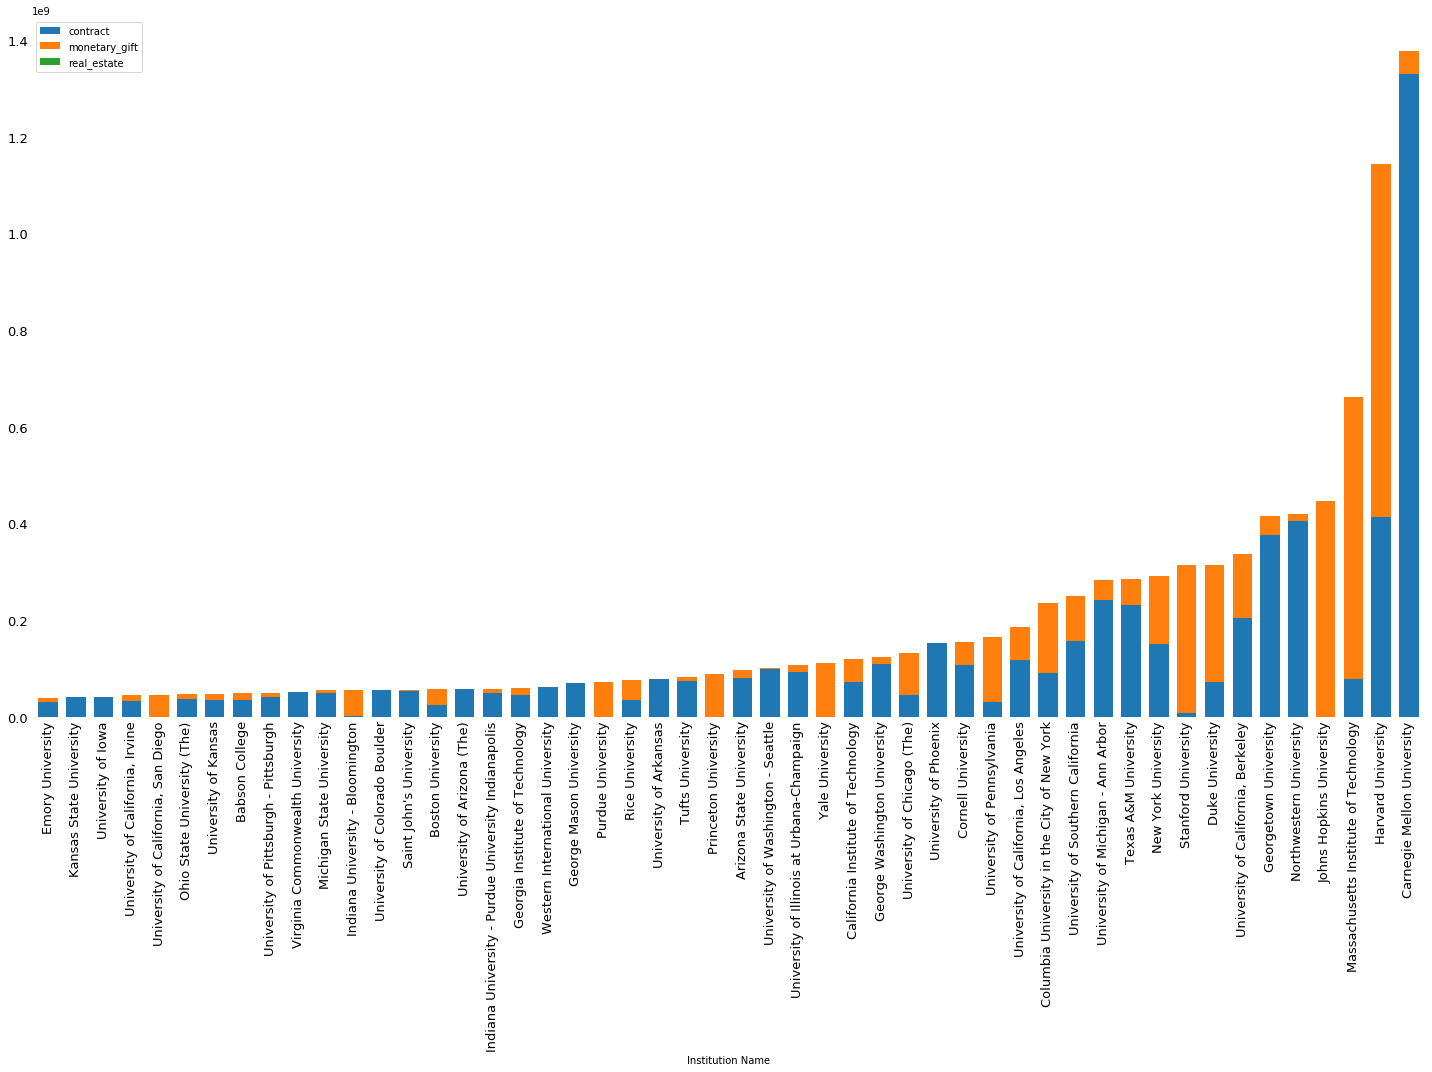

In [34]:
df2.sort_values(by='total',ascending = False).head(50).sort_values(by='total').plot(x='Institution Name',
                                                y =['contract','monetary_gift','real_estate'] ,
                                                kind= 'bar',
                                                figsize=(20,15),
                                                stacked= True,
                                                width =.7,
                                                fontsize = 13
                                                                                    
                                                )

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
#x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('universitygift.pdf')

In [35]:
df2.sort_values(by='total',ascending = False).head(50).sort_values(by='total',ascending = False)

,Institution Name,contract,monetary_gift,real_estate,total
8,Carnegie Mellon University,1329396157.0,48607650.0,0.0,1378003807.0
25,Harvard University,414521844.0,729378154.0,0.0,1143899998.0
37,Massachusetts Institute of Technology,77941942.0,582888432.0,0.0,660830374.0
31,Johns Hopkins University,15563.0,447443471.0,0.0,447459034.0
49,Northwestern University,404889382.0,15660791.0,0.0,420550173.0
22,Georgetown University,376812114.0,38810081.0,0.0,415622195.0
72,"University of California, Berkeley",204056448.0,132745273.0,0.0,336801721.0
16,Duke University,72545907.0,242147330.0,0.0,314693237.0
63,Stanford University,8044937.0,305730258.0,0.0,313775195.0
48,New York University,151001850.0,140389153.0,0.0,291391003.0


In [36]:
df4 =df[(df['Country of Giftor']=='QATAR') | (df['Country of Giftor']=='ENGLAND' )| 
                                         (df['Country of Giftor']=='BERMUDA')| 
   (df['Country of Giftor']=='CHINA')| (df['Country of Giftor']=='SAUDI ARABIA')]
df4.columns

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')

In [37]:
df2.sort_values(by='total',ascending = False).head(100)

,Institution Name,contract,monetary_gift,real_estate,total
8,Carnegie Mellon University,1329396157.0,48607650.0,0.0,1378003807.0
25,Harvard University,414521844.0,729378154.0,0.0,1143899998.0
37,Massachusetts Institute of Technology,77941942.0,582888432.0,0.0,660830374.0
31,Johns Hopkins University,15563.0,447443471.0,0.0,447459034.0
49,Northwestern University,404889382.0,15660791.0,0.0,420550173.0
22,Georgetown University,376812114.0,38810081.0,0.0,415622195.0
72,"University of California, Berkeley",204056448.0,132745273.0,0.0,336801721.0
16,Duke University,72545907.0,242147330.0,0.0,314693237.0
63,Stanford University,8044937.0,305730258.0,0.0,313775195.0
48,New York University,151001850.0,140389153.0,0.0,291391003.0


In [38]:
df4['Foreign Gift Amount'].sum()


4557815284

In [39]:
df['Foreign Gift Amount'].sum()


10629930796

In [40]:
df4['College Ranking'] = df4['Institution Name']
number = 0
df4['College Ranking'] = df4['College Ranking'].replace({
    "Carnegie Mellon University": 1,
    "Harvard University": 2,
    "Massachusetts Instiute of Technology": 3,
    'Johns Hopkins University': 4,
    "Northwestern Unversity": 5
})
df4['College Ranking'].str.replace(r'[A-Za-z]', 6)

/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: repl must be a string or callable

In [ ]:
df4.head()

In [ ]:
df4 = df4.groupby(by=['Country of Giftor','Institution Name'], as_index = False).sum()


In [ ]:
colormap = {'Carnegie Mellon University': '#A4C089',
          "Harvard University": '#71C680',
          "Massachusetts Instiute of Technology":'#34776F',
          'Johns Hopkins University': '#C9E35E',
           "Northwestern Unversity": '#163828',
           #6: '#898B7E'
           }

In [ ]:
df4.groupby(by='Country of Giftor')['Foreign Gift Amount'].count().sort_values()


In [ ]:
df4.groupby(by='Country of Giftor')['Foreign Gift Amount'].sum()


In [ ]:

order=[0,7,4,5,8,9,6,1,3,2]

In [ ]:
df4.head()

In [ ]:
df4.pivot(index='Country of Giftor',columns='Institution Name', values='Foreign Gift Amount')

In [ ]:
df4.pivot(index='Country of Giftor',columns='Institution Name', values='Foreign Gift Amount').reset_index().loc[order].plot(
                                                                x='Country of Giftor', 
                                                                kind='barh', 
                                                                figsize = (12, 6), width = .65,
                                                                stacked=True,
                                                                edgecolor='lightgray',
                                                                linewidth = '1',
                                                                color = '#898B7E',
                                                                legend = False
                                                                )
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
#x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('barcode.pdf')

In [ ]:
df4.pivot(index='Country of Giftor',columns='Institution Name', values='Foreign Gift Amount').reset_index().plot(
                                                                x='Country of Giftor', 
                                                                kind='barh', 
                                                                figsize = (40, 0),
                                                                stacked=True,
                                                                edgecolor='lightgray',
                                                                linewidth = '3'
                                                                )
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('england.pdf')

In [ ]:
df4 =df4.groupby(by=['Institution Name','Country of Giftor'])['Foreign Gift Amount'].sum().reset_index()
df4.pivot(index='Institution Name',columns='Country of Giftor', values='Foreign Gift Amount').reset_index().plot(
                                                                x='Country of Giftor', 
                                                                kind='barh', 
                                                                figsize = (40, 20),
                                                                stacked=True)

In [ ]:
df.groupby(by=['Institution Name','Country of Giftor'], as_index = False)['Foreign Gift Amount'].sum()\
.sort_values(by='Foreign Gift Amount', ascending = False).

In [ ]:
contract2 = df[df['Gift Type'] == 'Contract'].groupby(by='Country of Giftor', as_index = False).sum()
contract2 = contract2.drop(columns=['ID', 'OPEID'])
monetary_gift2 = df[df['Gift Type'] == 'Monetary Gift'].groupby(by='Country of Giftor', as_index = False).sum()
monetary_gift2 = monetary_gift2.drop(columns=['ID', 'OPEID'])
real_estate2 = df[df['Gift Type'] == 'Real Estate'].groupby(by='Country of Giftor', as_index = False).sum()
real_estate2 = real_estate2.drop(columns=['ID', 'OPEID'])


In [ ]:
df3 = pd.merge(contract2, monetary_gift2, on='Country of Giftor', how='outer')
df3 = pd.merge(df3, real_estate2, on='Country of Giftor', how='outer')
df3 = df3.fillna(0)

In [ ]:
df3.rename(columns={'Foreign Gift Amount_x':'contract',
                    'Foreign Gift Amount_y':'monetary_gift',
                  'Foreign Gift Amount': 'real_estate' }, inplace=True)

In [ ]:
df3['total'] = df3['contract'] + df3['monetary_gift'] + df3['real_estate']

In [ ]:
df3.sort_values(by='total',ascending = False)

In [ ]:
df3.to_csv('countrygift.csv', index = False)

In [57]:
df.sort_values(by= 'Foreign Gift Received Date')

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
2664,2665,278500,New York University,New York,NY,2012-01-01,648619,Contract,SWITZERLAND,Nobel Biocare AG
7564,7565,215500,Harvard University,Cambridge,MA,2012-01-01,1500000,Monetary Gift,GREECE,NaN
7558,7559,215500,Harvard University,Cambridge,MA,2012-01-01,1290000,Monetary Gift,SOUTH AFRICA,NaN
18886,18887,132000,"University of California, Santa Barbara",Santa Barbara,CA,2012-01-01,250000,Contract,ENGLAND,Rolls-Royce Group PLC
1180,1181,131200,"University of California, Berkeley",Berkeley,CA,2012-01-01,1440000,Contract,SAUDI ARABIA,King Abdullah Univ. of Science & Te
14370,14371,131400,"University of California, Irvine",Irvine,CA,2012-01-01,270000,Contract,SOUTH KOREA,Kookmin University
376,377,215500,Harvard University,Cambridge,MA,2012-01-01,4150000,Monetary Gift,INDONESIA,NaN
7210,7211,215500,Harvard University,Cambridge,MA,2012-01-01,315000,Monetary Gift,SPAIN,NaN
10764,10765,450800,University of Colorado Denver,Denver,CO,2012-01-01,59504,Contract,SOUTH AFRICA,RMPRU PERCH A DIVISION OF WITS HEAL
4130,4131,131200,"University of California, Berkeley",Berkeley,CA,2012-01-01,432320,Contract,SAUDI ARABIA,KAUST U.S. Limited


In [56]:
df[df['Country of Giftor'] == 'INDIA'].sort_values(by='Foreign Gift Amount', ascending = False)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
20754,20755,2171500,Western International University,Tempe,AZ,2014-04-17,38000000,Contract,INDIA,HCL
20132,20133,2098800,University of Phoenix,Phoenix,AZ,2014-04-17,38000000,Contract,INDIA,HCL
20133,20134,2098800,University of Phoenix,Phoenix,AZ,2014-04-17,38000000,Contract,INDIA,HCL
20134,20135,2098800,University of Phoenix,Phoenix,AZ,2014-07-31,38000000,Contract,INDIA,HCL
36,37,131700,"University of California, San Diego",La Jolla,CA,2018-02-28,28000000,Monetary Gift,INDIA,Tata Education and Development Trus
5711,5712,324200,Carnegie Mellon University,Pittsburgh,PA,2015-09-30,10000000,Monetary Gift,INDIA,NaN
148,149,217800,Massachusetts Institute of Technology,Cambridge,MA,2016-08-05,9950000,Monetary Gift,INDIA,SIR DORABJI TATA TRUST AND ALLIED T
8108,8109,186900,Iowa State University of Science & Technology,Ames,IA,2018-06-27,7500000,Contract,INDIA,Andhra Pradesh State Mega Seed Park
248,249,271100,Cornell University,Ithaca,NY,2018-03-30,5733625,Monetary Gift,INDIA,Ratan Tata
9581,9582,217800,Massachusetts Institute of Technology,Cambridge,MA,2015-06-23,5000000,Monetary Gift,INDIA,Sir Dorabji Tata Trust and Allied T


/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


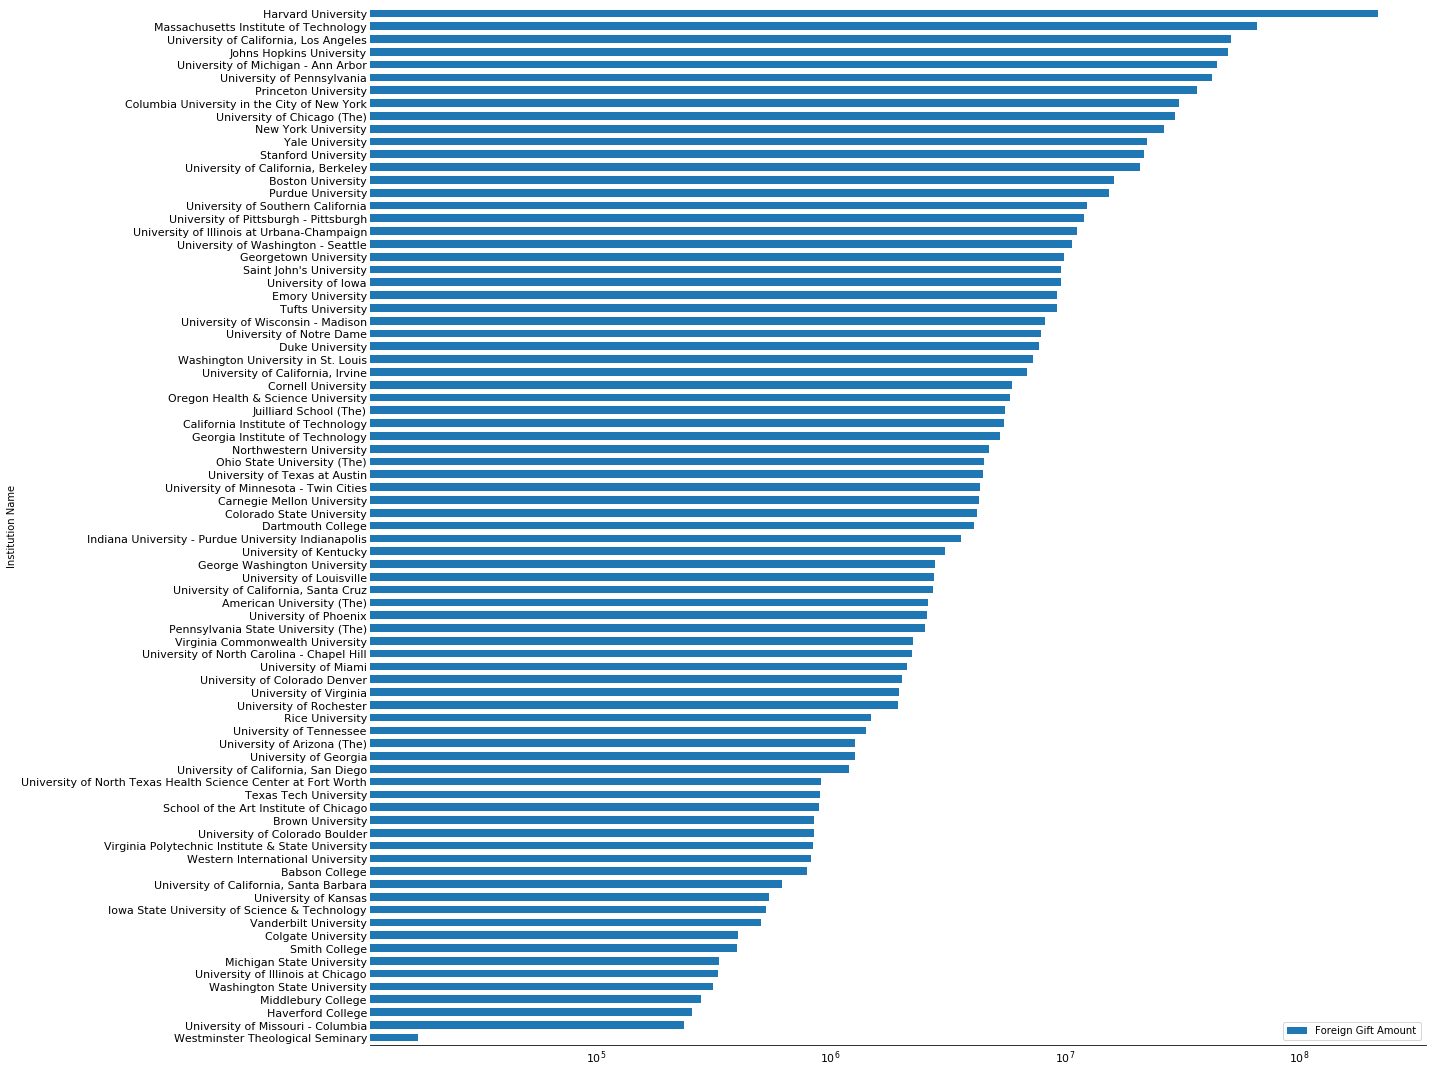

In [49]:
df[df['Country of Giftor'] == 'ENGLAND'].groupby(by= 'Institution Name', as_index=False).sum().sort_values(by='Foreign Gift Amount').plot(x='Institution Name',
                                                              y='Foreign Gift Amount',
                                                              figsize= (20,15),
                                                             kind= 'barh',
                                                             stacked=True,
                                                            width = .6, fontsize = 11,
                                                            logx = True)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
#x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('england.pdf')

In [51]:
df[df['Country of Giftor'] == 'ENGLAND'].groupby(by= 'Institution Name', as_index=False).sum().sort_values(by='Foreign Gift Amount', ascending = False)

,Institution Name,ID,OPEID,Foreign Gift Amount
16,Harvard University,11695,6034000,217005636
22,Massachusetts Institute of Technology,238285,6098400,65960984
42,"University of California, Los Angeles",13765281,117298000,51186060
20,Johns Hopkins University,199291,9138800,49652346
57,University of Michigan - Ann Arbor,782235,18832500,44877923
63,University of Pennsylvania,211024,11147400,42438420
30,Princeton University,1558676,36252600,36840555
8,Columbia University in the City of New York,869008,29777000,30871338
46,University of Chicago (The),518235,6563800,29450392
25,New York University,185515,9469000,26647611


In [ ]:
df[df['Country of Giftor'] == 'QATAR'].groupby(by= 'Institution Name', as_index=False).sum().sort_values(by='Foreign Gift Amount').plot(x='Institution Name',
                                                              y='Foreign Gift Amount',
                                                              figsize= (10,5),
                                                             kind= 'barh',
                                                             stacked=True,
                                                             logx = True,
                                                            width = .7)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('qatar.pdf')

In [ ]:
df[df['Country of Giftor'] == 'QATAR'].groupby(by= 'Institution Name', as_index=False).sum().sort_values(by='Foreign Gift Amount')

In [ ]:
df[df['Country of Giftor'] == 'ENGLAND'].groupby(by= 'Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [ ]:
df[df['Country of Giftor'] == 'BERMUDA'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [ ]:
df[df['Country of Giftor'] == 'CHINA'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [ ]:
df[df['Country of Giftor'] == 'CHINA'].groupby(by= 'Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [ ]:
df[df['Country of Giftor'] == 'SAUDI ARABIA'].groupby(by= 'Institution Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [ ]:
df[df['Country of Giftor'] == 'SAUDI ARABIA'].groupby(by= 'Giftor Name').sum().sort_values(by='Foreign Gift Amount',ascending = False)

In [ ]:
df3.sort_values(by= 'total').head(10).sort_values(by='total').plot(x='Country of Giftor',
                                                              y=['contract','monetary_gift'],
                                                              figsize= (20,13),
                                                             kind= 'barh',
                                                             stacked=True)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
ax1.tick_params(axis=u'both', which=u'both',length=0)
x_axis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('countrygift.pdf')

In [ ]:
df.plot.line(x='pig', y='horse')